In [39]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [40]:
#Case 5A: k = 1e-15 || CO2 injection at 60°C + H2O in the reservoir || 800m Well Spacing || m_flux_CO2 = 6

In [41]:
k_CO2_1em15 = pd.read_csv('CO2_5A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_CO2_1em15["Energy Production at this timestep"] = (k_CO2_1em15.mass_kg_h2o_extracted_this_timestep * k_CO2_1em15.h_w)*1000
k_CO2_1em15["Cumulative Energy Produced"] = k_CO2_1em15["Energy Production at this timestep"].cumsum()
k_CO2_1em15["Cumulative Produced CO2"] = k_CO2_1em15["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2: time * mass flow CO2
k_CO2_1em15["Injected CO2 [kg]"] = k_CO2_1em15["time"]*6
#Conversion to kilotons
k_CO2_1em15["Injected CO2 [kt]"] = k_CO2_1em15["Injected CO2 [kg]"]*1e-6
#
#MW produced:

k_CO2_1em15["MW"] = (k_CO2_1em15["Cumulative Energy Produced"]/1e6)/k_CO2_1em15["time"]

#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em15["Stored CO2 [kt]"] = (k_CO2_1em15["Injected CO2 [kg]"] - k_CO2_1em15["mass_kg_co2_extracted_this_timestep"])*1e-6

k_CO2_1em15["Time [y]"] = k_CO2_1em15["time"]/3.154E7
k_CO2_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],MW,Stored CO2 [kt],Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0,0,0.0000,NaN,0.0000,0.000000
1,86400,0,1,457030.863798,3.045161e+06,0,3.083909e+09,0,1007.354092,0.000038,...,127.852873,772.658027,3.067555e+12,3.067555e+12,0,518400,0.5184,35.504109,0.5184,0.002739
2,259200,0,1,457084.397969,3.050061e+06,0,4.928709e+09,0,1608.250468,0.000038,...,126.098268,772.451751,4.905262e+12,7.972817e+12,0,1555200,1.5552,30.759326,1.5552,0.008218
3,604800,0,1,457040.567108,3.052568e+06,0,8.865723e+09,0,2892.446367,0.000038,...,125.136890,772.183924,8.829390e+12,1.680221e+13,0,3628800,3.6288,27.781428,3.6288,0.019176
4,1296000,0,1,456917.501344,3.054136e+06,0,1.629256e+10,0,5316.307309,0.000038,...,124.448303,771.798333,1.623673e+13,3.303893e+13,0,7776000,7.7760,25.493004,7.7760,0.041091
5,2678400,0,1,456714.322924,3.055166e+06,0,3.008964e+10,0,9822.284498,0.000038,...,123.883328,771.282194,3.000871e+13,6.304765e+13,0,16070400,16.0704,23.539294,16.0704,0.084921
6,5443200,0,1,456452.285615,3.055951e+06,0,5.530724e+10,0,18063.343637,0.000038,...,123.354560,770.699525,5.520070e+13,1.182483e+14,0,32659200,32.6592,21.724049,32.6592,0.172581
7,10972800,0,1,456185.768732,3.056816e+06,0,1.003925e+11,0,32800.111696,0.000038,...,122.793601,770.203446,1.002639e+14,2.185122e+14,0,65836800,65.8368,19.913991,65.8368,0.347901
8,22032000,0,1,455965.589757,3.057949e+06,0,1.794796e+11,0,58640.925994,0.000038,...,122.178606,769.926504,1.793210e+14,3.978332e+14,0,132192000,132.1920,18.057063,132.1920,0.698542
9,44150400,0,1,455806.986410,3.059362e+06,0,3.158786e+11,0,103176.053895,0.000038,...,121.519800,769.863222,3.156529e+14,7.134861e+14,0,264902400,264.9024,16.160355,264.9024,1.399822


In [42]:
#Case 5B: k = 1e-15 || H2O only - injection Temp 60°C|| 800m Well Spacing || m_flux_H2O = 6,7 kg/s 

In [43]:
k_H2O_1em15 = pd.read_csv("H2O_5B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em15["Energy Production at this timestep"] = (k_H2O_1em15.mass_kg_h2o_extracted_this_timestep * k_H2O_1em15.h_w)*1000
k_H2O_1em15["Cumulative Energy Produced"] = k_H2O_1em15["Energy Production at this timestep"].cumsum()
# Injected H2O: time * mass flow H2O
k_H2O_1em15["Injected H2O [kg]"] = k_H2O_1em15["time"]*6.7
# Production mass rate:
k_H2O_1em15["Production mass flow kg/s"] = k_H2O_1em15["mass_kg_h2o_extracted_this_timestep"]/k_H2O_1em15["time"]
#Cumulative Injected:
#k_H2O_1em15["Cumulative Mass Injected"] = k_H2O_1em15["Injected H2O [kg]"].cumsum()
#Producing more than injected?:
k_H2O_1em15["Stored mass in kg"] = k_H2O_1em15["Injected H2O [kg]"] - k_H2O_1em15["mass_kg_h2o_extracted_this_timestep"]
#
#MW produced:

k_H2O_1em15["MW"] = (k_H2O_1em15["Cumulative Energy Produced"]/1e6)/k_H2O_1em15["time"]

k_H2O_1em15["Time [y]"] = k_H2O_1em15["time"]/3.154E7
k_H2O_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Injected H2O [kg],Production mass flow kg/s,Stored mass in kg,MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,0.000000
1,86400,0,1,457030.863789,3.045161e+06,0,3.083909e+09,0,1007.354096,0.000038,...,208.938255,127.852873,772.658027,3.067555e+12,3.067555e+12,5.788800e+05,0.011659,5.778726e+05,35.504109,0.002739
2,259200,0,1,457084.397961,3.050061e+06,0,4.928709e+09,0,1608.250469,0.000038,...,207.112200,126.098268,772.451751,4.905262e+12,7.972817e+12,1.736640e+06,0.006205,1.735032e+06,30.759326,0.008218
3,604800,0,1,457040.567100,3.052568e+06,0,8.865723e+09,0,2892.446367,0.000038,...,206.090837,125.136890,772.183924,8.829390e+12,1.680221e+13,4.052160e+06,0.004782,4.049268e+06,27.781428,0.019176
4,1296000,0,1,456917.501336,3.054136e+06,0,1.629256e+10,0,5316.307410,0.000038,...,205.339002,124.448303,771.798333,1.623673e+13,3.303893e+13,8.683200e+06,0.004102,8.677884e+06,25.493004,0.041091
5,2678400,0,1,456714.319046,3.055166e+06,0,3.008974e+10,0,9822.317867,0.000038,...,204.701370,123.883356,771.282191,3.000881e+13,6.304775e+13,1.794528e+07,0.003667,1.793546e+07,23.539332,0.084921
6,5443200,0,1,456452.193994,3.055950e+06,0,5.531108e+10,0,18064.602768,0.000038,...,204.090278,123.355094,770.699430,5.520451e+13,1.182523e+14,3.646944e+07,0.003319,3.645138e+07,21.724769,0.172581
7,10972800,0,1,456185.272611,3.056808e+06,0,1.004245e+11,0,32810.638657,0.000038,...,203.443550,122.795889,770.202867,1.002958e+14,2.185481e+14,7.351776e+07,0.002990,7.348495e+07,19.917258,0.347901
8,22032000,0,1,455961.765064,3.057898e+06,0,1.798903e+11,0,58775.942490,0.000038,...,202.756711,122.193635,769.921961,1.797308e+14,3.982789e+14,1.476144e+08,0.002668,1.475556e+08,18.077294,0.698542
9,44150400,0,1,455791.013162,3.059182e+06,0,3.185656e+11,0,104059.115047,0.000038,...,202.055114,121.570671,769.844107,3.183358e+14,7.166147e+14,2.958077e+08,0.002357,2.957036e+08,16.231216,1.399822


In [44]:
# Cumulative Energy Production over 20 Years: H2O only vs. CO2 injection

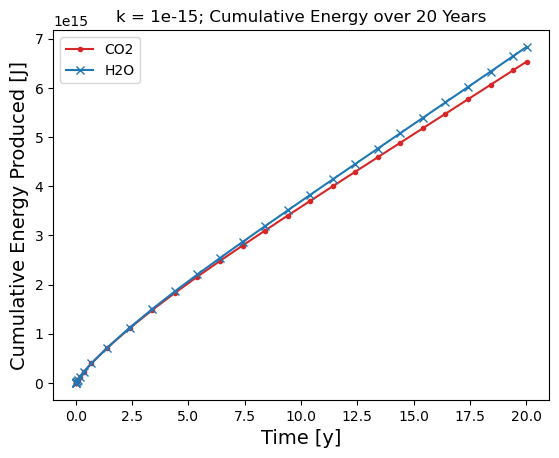

In [45]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em15["Time [y]"], k_H2O_1em15["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-15; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case5/Case5_cum_energy_k_1em15.png')

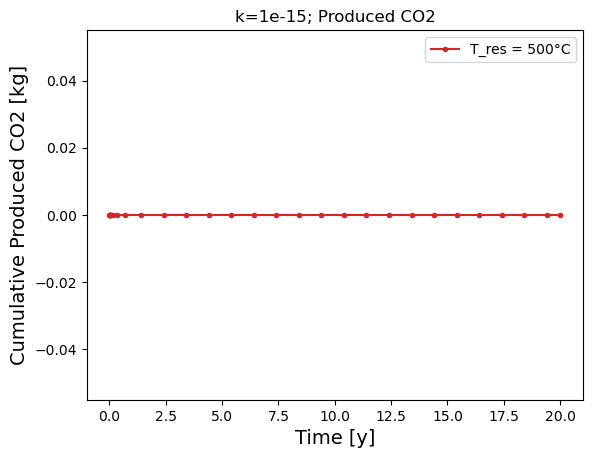

In [46]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case5/Case5_co2_production_k_1em15.png')

In [47]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

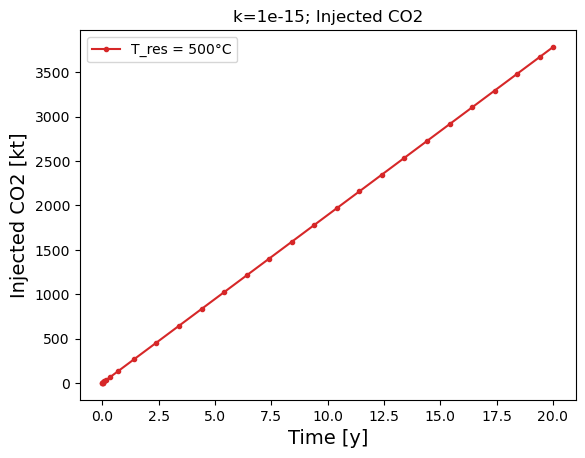

In [48]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case5/Case5_co2_injection_k_1em15.png')

In [49]:
#Stored CO2 in kt at mass flux CO2 19kg/s 

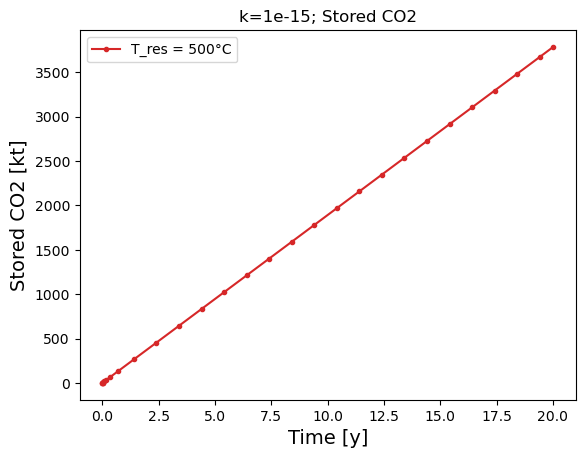

In [50]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case5/Case5_co2_stored_k_1em15.png')